In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
import xgboost as xgb
import pickle as pkl
import importlib
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC
from xgboost.sklearn import XGBClassifier as XGBC
from sklearn.linear_model import LogisticRegression as LR
import scripts.xgboost_tuning as xgb_tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import log_loss, roc_auc_score, precision_score, recall_score, f1_score, average_precision_score, accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams
import pyeeg
import pyrem as pruni
import scipy.signal as sig
import scipy.fftpack as fft
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from xgboost.sklearn import XGBRegressor as XGBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import ExtraTreesRegressor as ETR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mne.decoding import CSP
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches


rcParams['figure.figsize'] = 5, 5
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
%matplotlib inline

0.88103418327762151

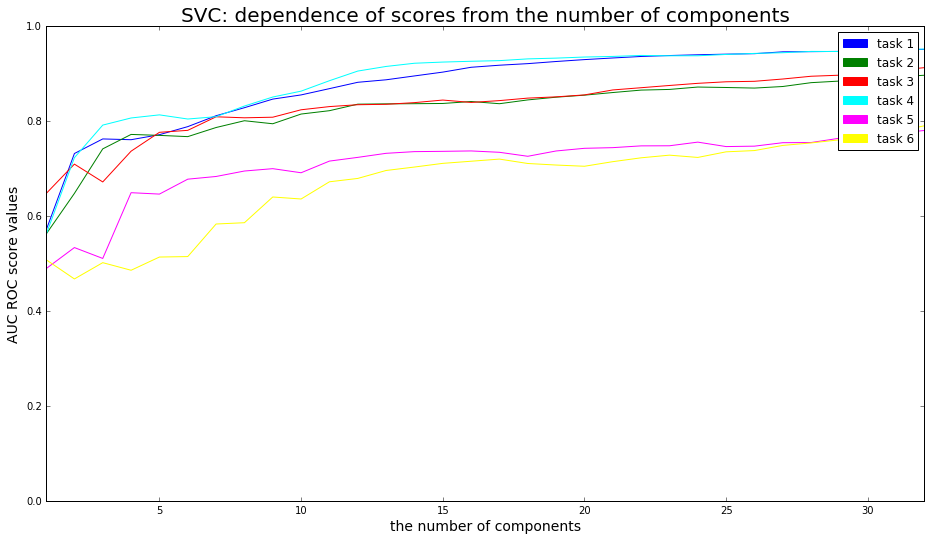

In [2]:
file = open('SVC_csp_tuning_results.pkl', 'rb')
csp_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 0], color='blue')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 1], color='green')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 2], color='red')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([1.0, 32.0])
ax.set_ylim([0.0, 1.0])
plt.title('SVC: dependence of scores from the number of components', fontsize=20)
plt.xlabel('the number of components', fontsize=14)
plt.ylabel('AUC ROC score values', fontsize=14)
csp_tuning_scores[1][1][-1].mean()

0.90392145432553284

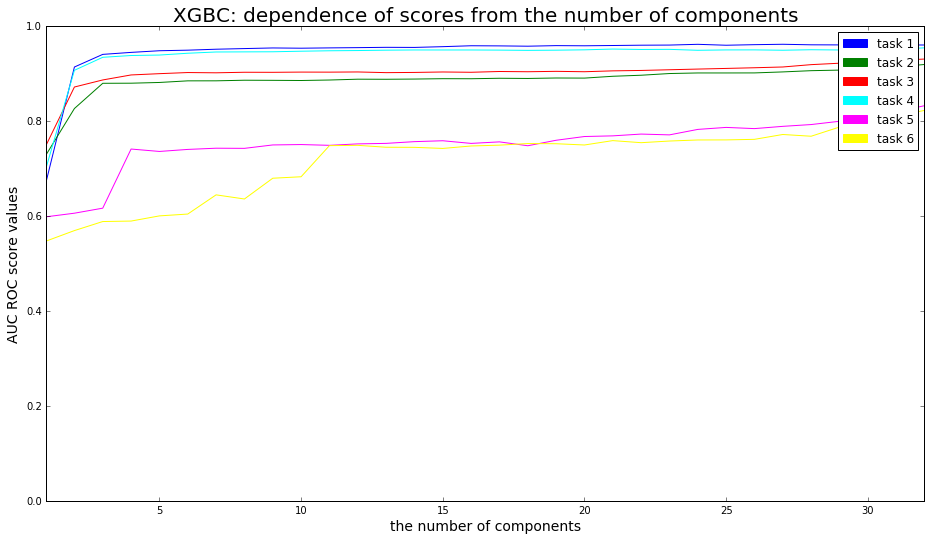

In [3]:
file = open('XGBC_csp_tuning_results.pkl', 'rb')
csp_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 0], color='blue')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 1], color='green')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 2], color='red')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([1.0, 32.0])
ax.set_ylim([0.0, 1.0])
plt.title('XGBC: dependence of scores from the number of components', fontsize=20)
plt.xlabel('the number of components', fontsize=14)
plt.ylabel('AUC ROC score values', fontsize=14)
csp_tuning_scores[1][1][-1].mean()

0.88908462727864856

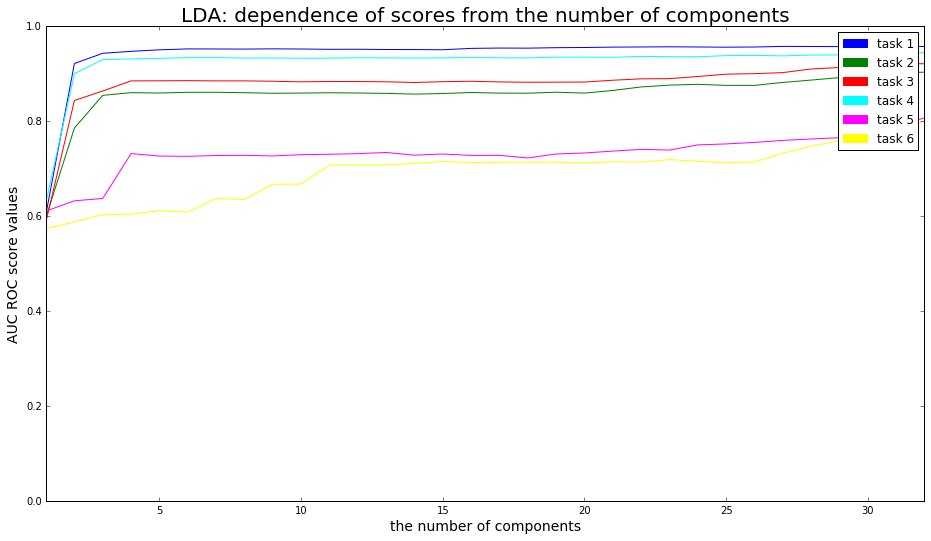

In [4]:
file = open('LDA_csp_tuning_results.pkl', 'rb')
csp_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 0], color='blue')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 1], color='green')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 2], color='red')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([1.0, 32.0])
ax.set_ylim([0.0, 1.0])
plt.title('LDA: dependence of scores from the number of components', fontsize=20)
plt.xlabel('the number of components', fontsize=14)
plt.ylabel('AUC ROC score values', fontsize=14)
csp_tuning_scores[1][1][-1].mean()

0.87991952631549053

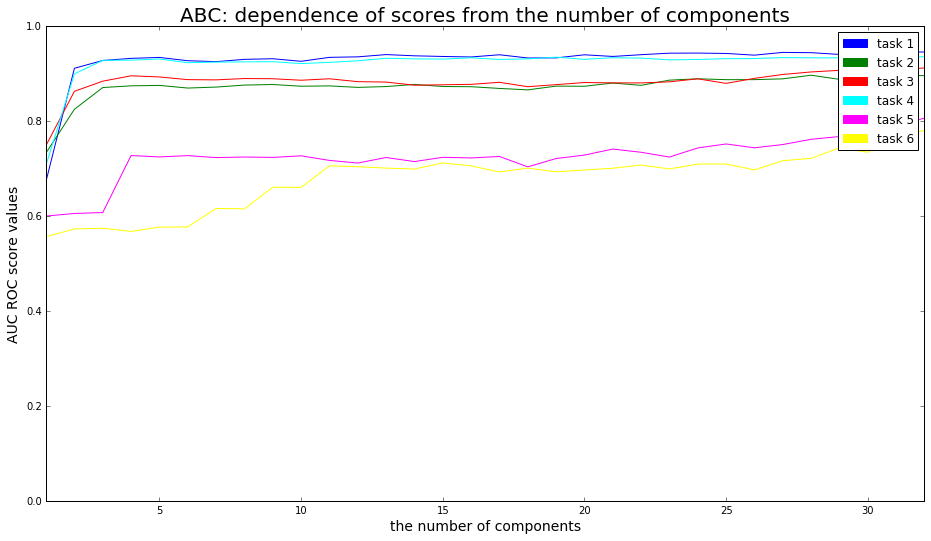

In [5]:
file = open('ABC_csp_tuning_results.pkl', 'rb')
csp_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 0], color='blue')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 1], color='green')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 2], color='red')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([1.0, 32.0])
ax.set_ylim([0.0, 1.0])
plt.title('ABC: dependence of scores from the number of components', fontsize=20)
plt.xlabel('the number of components', fontsize=14)
plt.ylabel('AUC ROC score values', fontsize=14)
csp_tuning_scores[1][1][-1].mean()

0.88860907442185189

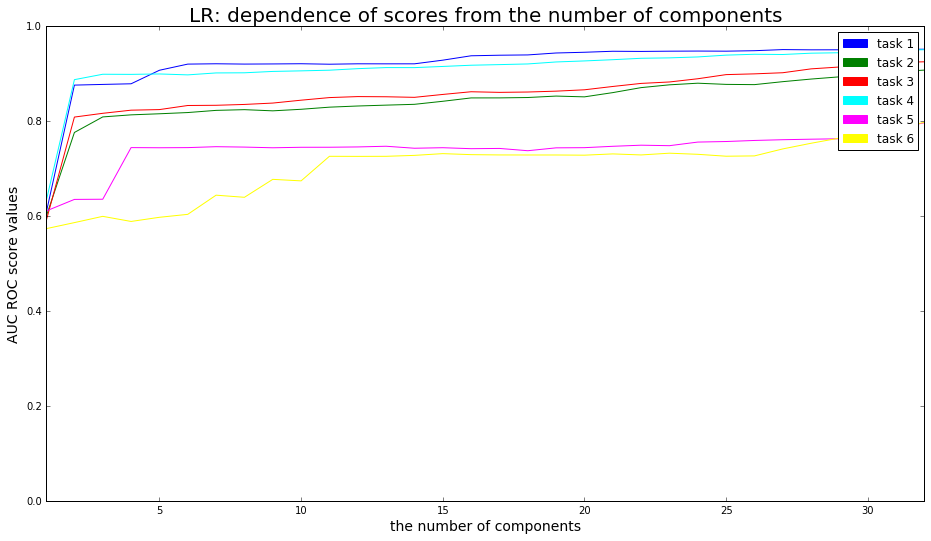

In [6]:
file = open('LR_csp_tuning_results.pkl', 'rb')
csp_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')
csp_tuning_scores[1][1][-1].mean()
ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 0], color='blue')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 1], color='green')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 2], color='red')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(csp_tuning_scores[0][1], csp_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([1.0, 32.0])
ax.set_ylim([0.0, 1.0])
plt.title('LR: dependence of scores from the number of components', fontsize=20)
plt.xlabel('the number of components', fontsize=14)
plt.ylabel('AUC ROC score values', fontsize=14)
csp_tuning_scores[1][1][-1].mean()

(('fractions',
  array([ 0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  0.99])),
 ('auc roc',
  array([[ 0.59499463,  0.648721  ,  0.67833934,  0.60176971,  0.63792158,
           0.63434775],
         [ 0.60056776,  0.65346039,  0.68252305,  0.60206751,  0.64761616,
           0.63422848],
         [ 0.60236643,  0.65669008,  0.68804962,  0.60750559,  0.6503609 ,
           0.64110661],
         [ 0.60736458,  0.66377163,  0.69341912,  0.61944844,  0.6468551 ,
           0.64914828],
         [ 0.660953  ,  0.85117089,  0.83627331,  0.82531357,  0.75346247,
           0.66743952],
         [ 0.94521399,  0.90538929,  0.92129933,  0.93478007,  0.83165552,
           0.8215321 ],
         [ 0.93567956,  0.90100941,  0.92388178,  0.92580442,  0.83797969,
           0.82936195],
         [ 0.91350929,  0.89344896,  0.91033808,  0.92111853,  0.82942461,
           0.82718274],
         [ 0.90202909,  0.8652154 ,  0.89053802,  0.8919692 ,  0.80127589,
           0.80729443],

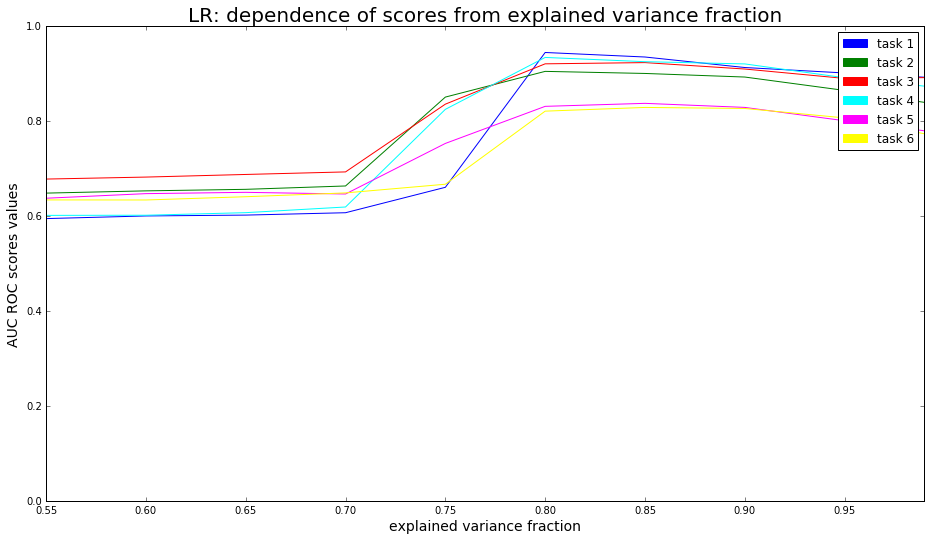

In [2]:
file = open('LR_pca_tuning_results.pkl', 'rb')
pca_tuning_scores = pkl.load(file)
file.close()

fig = plt.figure(figsize=(10, 8.5))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch])

ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 0], color='blue')
ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 1], color='green')
ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 2], color='red')
ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 3], color='cyan')
ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 4], color='magenta')
ax.plot(pca_tuning_scores[0][1], pca_tuning_scores[1][1][:, 5], color='yellow')

ax.set_xlim([0.55, 0.99])
ax.set_ylim([0.0, 1.0])
plt.title('LR: dependence of scores from explained variance fraction', fontsize=20)
plt.xlabel('explained variance fraction', fontsize=14)
plt.ylabel('AUC ROC scores values', fontsize=14)
pca_tuning_scores

In [5]:
file = open('SVC_csp_tuning_results.pkl', 'rb')
csp_svc = pkl.load(file)
file.close()
file = open('XGBC_csp_tuning_results.pkl', 'rb')
csp_xgbc = pkl.load(file)
file.close()
file = open('LDA_csp_tuning_results.pkl', 'rb')
csp_lda = pkl.load(file)
file.close()
file = open('ABC_csp_tuning_results.pkl', 'rb')
csp_abc = pkl.load(file)
file.close()
file = open('LR_csp_tuning_results.pkl', 'rb')
csp_lr = pkl.load(file)
file.close()

In [11]:
mean_auc_roc = (csp_svc[1][1] + csp_xgbc[1][1] + csp_lda[1][1] + csp_abc[1][1] + csp_lr[1][1]) / 5.0
print('variance', mean_auc_roc[-1])
print('dynamic', pca_tuning_scores[1][1][5])
print('united', [0.9488, 0.9118, 0.9283, 0.9425, 0.8395, 0.8291])

variance [ 0.95378588  0.90505482  0.92089215  0.94799038  0.80493289  0.79842651]
dynamic [ 0.94521399  0.90538929  0.92129933  0.93478007  0.83165552  0.8215321 ]
united [0.9488, 0.9118, 0.9283, 0.9425, 0.8395, 0.8291]


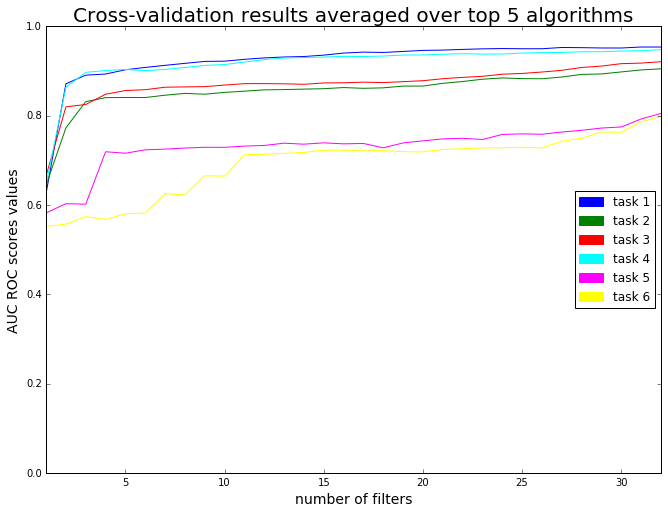

In [4]:
fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch], loc=5)

ax.plot(np.arange(1, 33), mean_auc_roc[:, 0], color='blue')
ax.plot(np.arange(1, 33), mean_auc_roc[:, 1], color='green')
ax.plot(np.arange(1, 33), mean_auc_roc[:, 2], color='red')
ax.plot(np.arange(1, 33), mean_auc_roc[:, 3], color='cyan')
ax.plot(np.arange(1, 33), mean_auc_roc[:, 4], color='magenta')
ax.plot(np.arange(1, 33), mean_auc_roc[:, 5], color='yellow')

ax.set_xlim([1, 32])
ax.set_ylim([0.0, 1.0])
plt.title('Cross-validation results averaged over top 5 algorithms', fontsize=20)
plt.xlabel('number of filters', fontsize=14)
plt.ylabel('AUC ROC scores values', fontsize=14)
plt.show()

In [8]:
csp_svc[1][1][-1]

array([ 0.95175739,  0.89720748,  0.91329296,  0.95246325,  0.78082261,
        0.7906614 ])

In [9]:
csp_xgbc[1][1][-1]

array([ 0.96100259,  0.91994689,  0.93139095,  0.95504618,  0.83303395,
        0.82310818])

In [10]:
csp_lda[1][1][-1]

array([ 0.95793451,  0.90371824,  0.92155991,  0.94469483,  0.8069483 ,
        0.79965197])

In [11]:
csp_abc[1][1][-1]

array([ 0.94615923,  0.89632204,  0.91262614,  0.93669055,  0.80685415,
        0.78086505])

In [12]:
csp_lr[1][1][-1]

array([ 0.95207569,  0.90807943,  0.9255908 ,  0.95105711,  0.79700544,
        0.79784597])

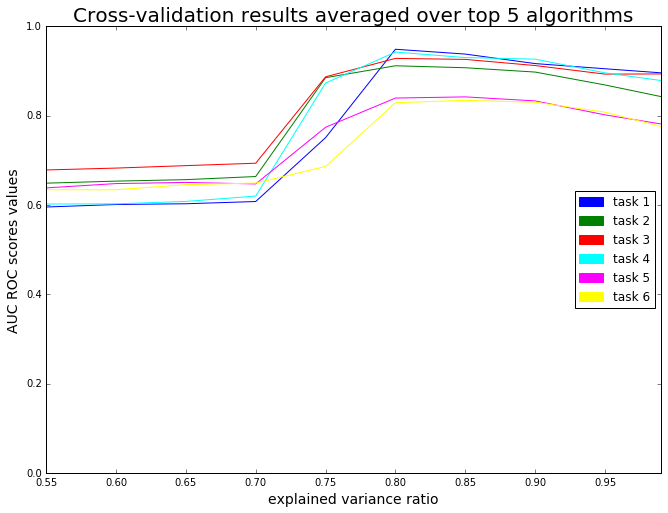

In [6]:
mean_pca_auc_roc = np.array([[0.5954, 0.6488, 0.6784, 0.6020, 0.6382, 0.6342],
                    [0.6010, 0.6534, 0.6826, 0.6025, 0.6479, 0.6340],
                    [0.6027, 0.6567, 0.6881, 0.6079, 0.6505, 0.6455],
                    [0.6077, 0.6637, 0.6935, 0.6199, 0.6471, 0.6490],
                    [0.7508, 0.8851, 0.8870, 0.8730, 0.7740, 0.6862],
                    [0.9488, 0.9118, 0.9283, 0.9425, 0.8395, 0.8291],
                    [0.9380, 0.9074, 0.9261, 0.9302, 0.8421, 0.8343],
                    [0.9167, 0.8977, 0.9123, 0.9266, 0.8331, 0.8302],
                    [0.9051, 0.8688, 0.8931, 0.8959, 0.8018, 0.8079],
                    [0.8960, 0.8428, 0.8935, 0.8788, 0.7815, 0.7759]])
explained_variance_ratio = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(left=0.57, right=1.79, wspace=0.0, hspace=0.0)

blue_patch = mpatches.Patch(color='blue', label='task 1')
green_patch = mpatches.Patch(color='green', label='task 2')
red_patch = mpatches.Patch(color='red', label='task 3')
cyan_patch = mpatches.Patch(color='cyan', label='task 4')
magneta_patch = mpatches.Patch(color='magenta', label='task 5')
yellow_patch = mpatches.Patch(color='yellow', label='task 6')

ax = plt.subplot(gs[0])
ax.legend(handles=[blue_patch, green_patch, red_patch, cyan_patch, magneta_patch, yellow_patch], loc=5)

ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 0], color='blue')
ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 1], color='green')
ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 2], color='red')
ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 3], color='cyan')
ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 4], color='magenta')
ax.plot(explained_variance_ratio, mean_pca_auc_roc[:, 5], color='yellow')

ax.set_xlim([0.55, 0.99])
ax.set_ylim([0.0, 1.0])
plt.title('Cross-validation results averaged over top 5 algorithms', fontsize=20)
plt.xlabel('explained variance ratio', fontsize=14)
plt.ylabel('AUC ROC scores values', fontsize=14)
plt.show()

In [2]:
auc_roc_solution = np.array([[0.95287671681703612, 0.91564586815961924, 0.92708060728920494, 0.9410234810303425,
                     0.82274458810091344, 0.81412027757805794],
                    [0.94887102158060488, 0.91188365385798453,0.92835002988162019, 0.9425424333831417,
                     0.83953723212782283, 0.82914072120557947],
                    [0.92903657279397878, 0.86092543060823834,0.88503517438498125, 0.92184324324349054,
                     0.78389700299891152, 0.77596152287636544],
                    [0.94665539593754022, 0.8930590062953131, 0.91144361839674815, 0.93513573225461954,
                     0.81266498313643754, 0.79301496832309726],
                    [0.9577365568011208, 0.90197541895863154, 0.91782470602896649, 0.93473801835499026,
                     0.82343064985479775, 0.82687689671902953]])

In [3]:
auc_roc_solution.mean(axis=0)

array([ 0.94703525,  0.89669788,  0.91394683,  0.93505658,  0.81645489,
        0.80782288])

In [6]:
mean_auc_roc = (csp_svc[1][1] + csp_xgbc[1][1] + csp_lda[1][1] + csp_abc[1][1] + csp_lr[1][1]) / 5.0

In [8]:
mean_auc_roc[-1]

array([ 0.95378588,  0.90505482,  0.92089215,  0.94799038,  0.80493289,
        0.79842651])